In [1]:
import geobr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
br_uf = geobr.read_state()
br_uf.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."


In [3]:
df = pd.read_csv('ABT_ABT_TARGET.csv')

In [4]:
df['TARGET'] =  (df['TARGET_MT9']+df['TARGET_LP9']).apply(lambda x: 1 if x>0 else 0)

In [5]:
max_aprend = np.max(df.groupby(['ID_PROVA_BRASIL', 'ID_UF'] , as_index=False)['TARGET'].mean())
max_aprend.TARGET                

0.3454317897371715

In [6]:
ano = 2017
agr = df[df.ID_PROVA_BRASIL==ano].groupby('ID_UF', as_index=False)['TARGET'].mean()

In [7]:
df_uf = pd.DataFrame(agr).rename(columns={"ID_UF": "code_state"})
df_uf

,code_state,TARGET
0,11,0.138965
1,12,0.080925
2,13,0.060976
3,14,0.029126
4,15,0.011364
5,16,0.006452
6,17,0.090293
7,21,0.010668
8,22,0.072588
9,23,0.235874


In [8]:
br_uf_2 = br_uf.merge(df_uf)

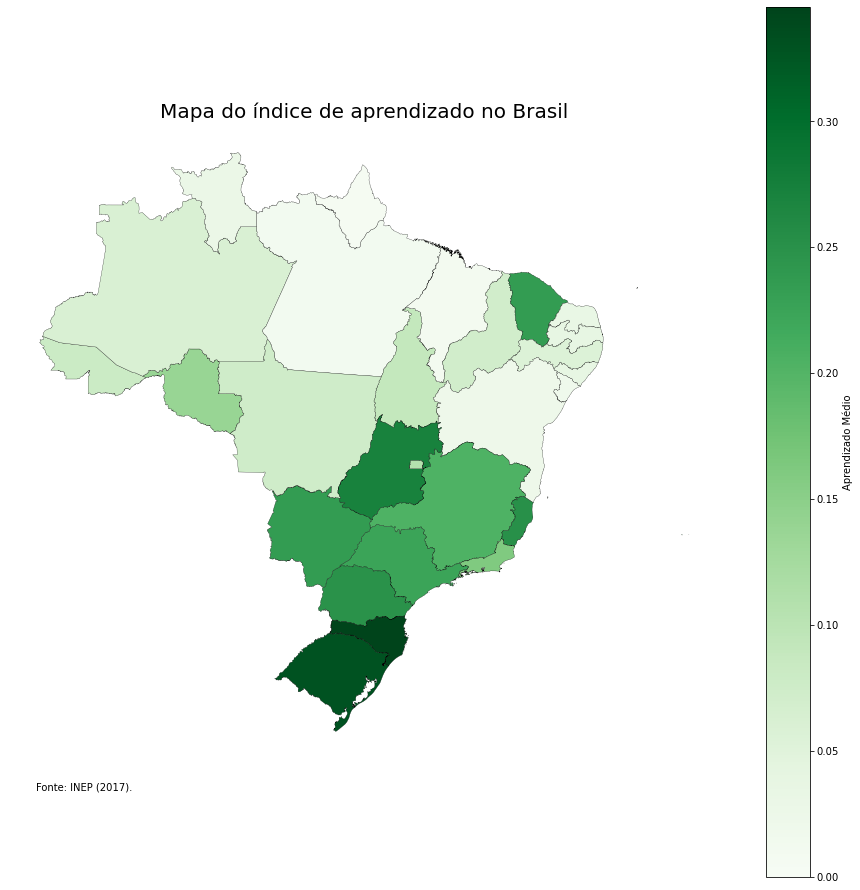

In [9]:
f, ax = plt.subplots()
f.set_size_inches(16, 16)
br_uf_2.plot(
    ax=ax, # Axis de destino do gráfico
    column="TARGET", # Coluna com os valores usados para colorir o mapa
    cmap="Greens", # Mapa de cores
    edgecolor="black", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    vmin=0, 
    vmax=max_aprend.TARGET,
    legend=True, 
    legend_kwds={'label': 'Aprendizado Médio'}
)

# Adiciona um título ao mapa
ax.set_title(
    "Mapa do índice de aprendizado no Brasil",
    fontdict={"fontsize": 20},
)

# Adiciona a fonte como nota de rodapé
f.text(
    0.15,                  # Posição x
    0.20,                  # Posição y
    "Fonte: INEP ("+str(ano)+")."  # Texto
)
ax.axis("off")          # Remove os eixos

plt.savefig('mapa'+str(ano)+'.png')

In [10]:
br_muni = geobr.read_municipality()
br_muni.head()

,code_muni,name_muni,code_state,abbrev_state,geometry
0,1100015.0,Alta Floresta D'oeste,11,RO,"MULTIPOLYGON (((-62.24620 -11.90149, -62.24151..."
1,1100023.0,Ariquemes,11,RO,"MULTIPOLYGON (((-63.13712 -9.78413, -63.09013 ..."
2,1100031.0,Cabixi,11,RO,"MULTIPOLYGON (((-60.52408 -13.32137, -60.37161..."
3,1100049.0,Cacoal,11,RO,"MULTIPOLYGON (((-61.42679 -11.11376, -61.42900..."
4,1100056.0,Cerejeiras,11,RO,"MULTIPOLYGON (((-61.41347 -13.23417, -61.42603..."


In [11]:
max_aprend_muni = np.max(df.groupby(['ID_PROVA_BRASIL', 'ID_MUNICIPIO'] , as_index=False)['TARGET'].mean())
max_aprend_muni.TARGET                

1.0

In [12]:
agr_muni = df.groupby('ID_MUNICIPIO')['TARGET'].agg(['mean','count']).reset_index()
agr_muni.head()

,ID_MUNICIPIO,mean,count
0,1100015,0.052632,19
1,1100023,0.039216,51
2,1100031,0.000000,3
3,1100049,0.092593,54
4,1100056,0.111111,9


In [13]:
df_muni = pd.DataFrame(agr_muni).rename(columns={"ID_MUNICIPIO": "code_muni"})

In [14]:
df_muni.describe()

,code_muni,mean,count
count,6.369000e+03,6369.000000,6369.000000
mean,3.635495e+06,0.120609,15.542785
std,1.364306e+06,0.230310,54.607140
min,1.100015e+06,0.000000,1.000000
25%,2.611309e+06,0.000000,3.000000
50%,3.300506e+06,0.000000,6.000000
75%,4.308409e+06,0.153846,14.000000
max,6.310995e+06,1.000000,3195.000000


In [15]:
df_muni

,code_muni,mean,count
0,1100015,0.052632,19
1,1100023,0.039216,51
2,1100031,0.000000,3
3,1100049,0.092593,54
4,1100056,0.111111,9
...,...,...,...
6364,6310696,0.000000,1
6365,6310702,0.000000,1
6366,6310825,1.000000,1
6367,6310852,1.000000,1


In [16]:
df_muni[df_muni['mean']==1]

,code_muni,mean,count
725,2202729,1.0,5
1127,2404804,1.0,2
2251,3100807,1.0,3
2286,3103900,1.0,3
2350,3109808,1.0,3
...,...,...,...
6355,6310515,1.0,1
6356,6310541,1.0,1
6357,6310572,1.0,1
6366,6310825,1.0,1


In [17]:
br_muni[br_muni.code_muni==2404804]

,code_muni,name_muni,code_state,abbrev_state,geometry
1126,2404804.0,Ipueira,24,RN,"MULTIPOLYGON (((-37.19266 -6.82614, -37.23460 ..."


In [18]:
ano = 2017
agr_muni = df[df.ID_PROVA_BRASIL==ano].groupby('ID_MUNICIPIO', as_index=False)['TARGET'].mean()
agr_muni.head()

,ID_MUNICIPIO,TARGET
0,1100015,0.111111
1,1100023,0.111111
2,1100031,0.000000
3,1100049,0.157895
4,1100056,0.500000


In [19]:
df_muni = pd.DataFrame(agr_muni).rename(columns={"ID_MUNICIPIO": "code_muni"})

In [20]:
br_muni_2 = br_muni.merge(df_muni)

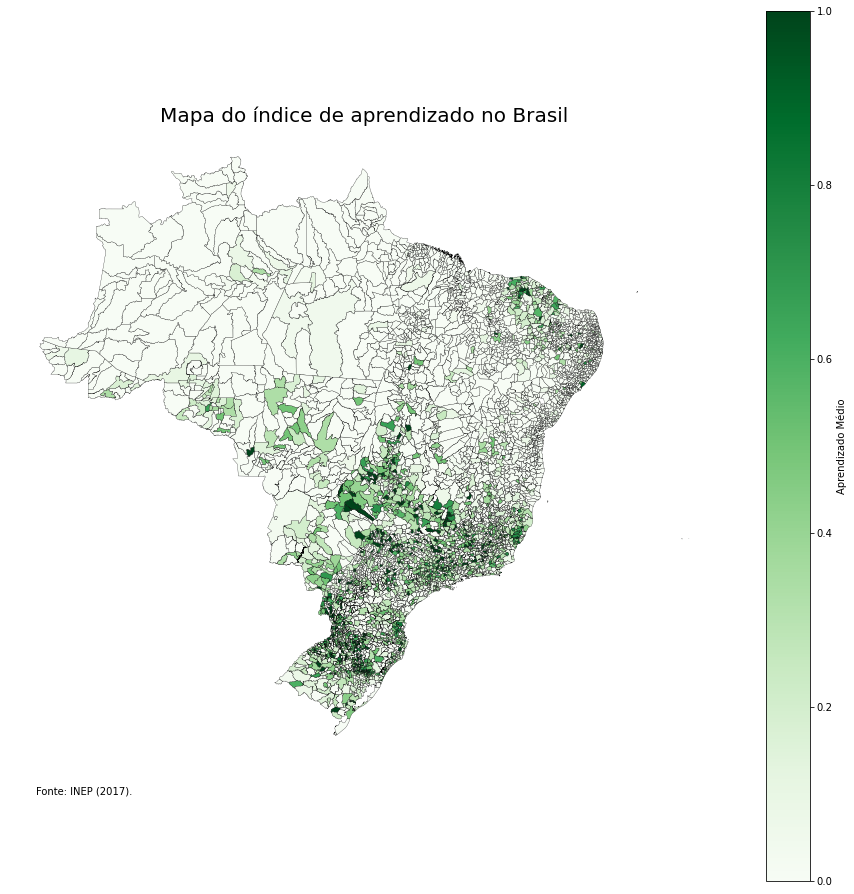

In [21]:
f, ax = plt.subplots()
f.set_size_inches(16, 16)
br_muni_2.plot(
    ax=ax, # Axis de destino do gráfico
    column="TARGET", # Coluna com os valores usados para colorir o mapa
    cmap="Greens", # Mapa de cores
    edgecolor="black", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    vmin=0, 
    vmax=max_aprend_muni.TARGET,
    legend=True, 
    legend_kwds={'label': 'Aprendizado Médio'}
)

# Adiciona um título ao mapa
ax.set_title(
    "Mapa do índice de aprendizado no Brasil",
    fontdict={"fontsize": 20},
)

# Adiciona a fonte como nota de rodapé
f.text(
    0.15,                  # Posição x
    0.20,                  # Posição y
    "Fonte: INEP ("+str(ano)+")."  # Texto
)
ax.axis("off")          # Remove os eixos

plt.savefig('mapa_muni'+str(ano)+'.png')

In [43]:
final = pd.read_csv('ABT_FINAL.csv')

In [44]:
ano = 2017
agr_final = final[final.ID_PROVA_BRASIL==ano].groupby('ID_UF', as_index=False)['predito'].mean()

In [45]:
df_uf_final = pd.DataFrame(agr_final).rename(columns={"ID_UF": "code_state"})
df_uf_final

,code_state,predito
0,11,0.067093
1,12,0.043165
2,13,0.040059
3,14,0.034884
4,15,0.012329
5,16,0.009804
6,17,0.045699
7,21,0.007848
8,22,0.020022
9,23,0.057307


In [46]:
br_uf_final= br_uf.merge(df_uf_final)

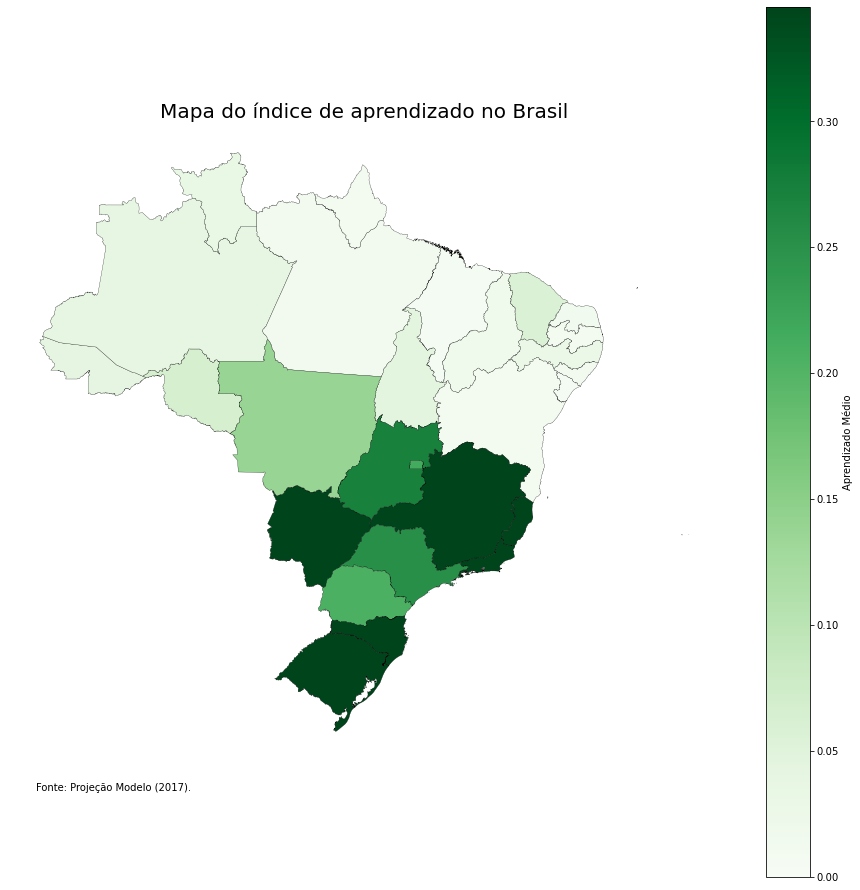

In [47]:
f, ax = plt.subplots()
f.set_size_inches(16, 16)
br_uf_final.plot(
    ax=ax, # Axis de destino do gráfico
    column="predito", # Coluna com os valores usados para colorir o mapa
    cmap="Greens", # Mapa de cores
    edgecolor="black", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    vmin=0, 
    vmax=max_aprend.TARGET,
    legend=True, 
    legend_kwds={'label': 'Aprendizado Médio'}
)

# Adiciona um título ao mapa
ax.set_title(
    "Mapa do índice de aprendizado no Brasil",
    fontdict={"fontsize": 20},
)

# Adiciona a fonte como nota de rodapé
f.text(
    0.15,                  # Posição x
    0.20,                  # Posição y
    "Fonte: Projeção Modelo ("+str(ano)+")."  # Texto
)
ax.axis("off")          # Remove os eixos

plt.savefig('mapa_final'+str(ano)+'.png')

In [48]:
final['cluster_num'] = final['cluster'].astype('int')

In [49]:
ano = 2017
agr_final = final[final.ID_PROVA_BRASIL==ano].groupby('ID_UF', as_index=False)['cluster_num'].mean()

In [50]:
df_uf_final = pd.DataFrame(agr_final).rename(columns={"ID_UF": "code_state"})
df_uf_final

,code_state,cluster_num
0,11,0.996805
1,12,0.978417
2,13,0.994065
3,14,0.953488
4,15,0.986301
5,16,1.000000
6,17,0.991935
7,21,0.989910
8,22,0.987764
9,23,0.999522


In [51]:
br_uf_final= br_uf.merge(df_uf_final)

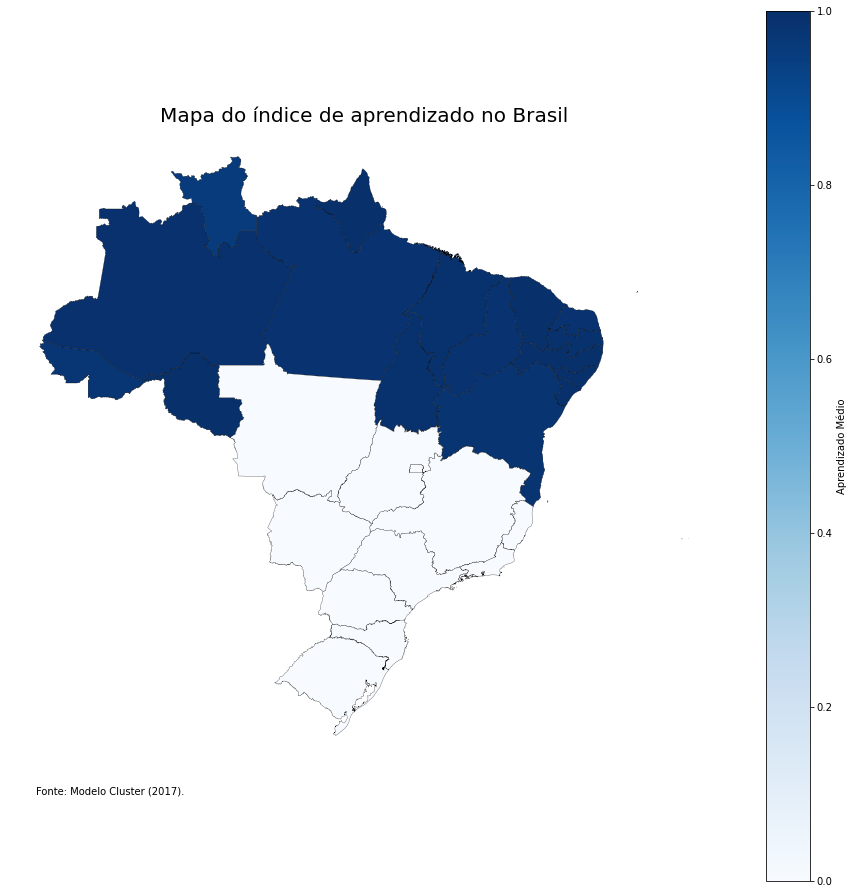

In [56]:
f, ax = plt.subplots()
f.set_size_inches(16, 16)
br_uf_final.plot(
    ax=ax, # Axis de destino do gráfico
    column="cluster_num", # Coluna com os valores usados para colorir o mapa
    cmap="Blues", # Mapa de cores
    edgecolor="black", # Cor dos contornos
    linewidth=0.25, # Espessura dos contornos
    legend=True, 
    legend_kwds={'label': 'Aprendizado Médio'}
)

# Adiciona um título ao mapa
ax.set_title(
    "Mapa do índice de aprendizado no Brasil",
    fontdict={"fontsize": 20},
)

# Adiciona a fonte como nota de rodapé
f.text(
    0.15,                  # Posição x
    0.20,                  # Posição y
    "Fonte: Modelo Cluster ("+str(ano)+")."  # Texto
)
ax.axis("off")          # Remove os eixos

plt.savefig('mapa_cluster'+str(ano)+'.png')